# 1.Import the required libareies:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")


### First study the problem statemnt of the given dataset and  what are the attributes are given by the customer to predict the target result. After study the problem statement importing the libararies load the csv file to read the dataset and the values which are contain in the given dataset, and do the required datamining , null imputation if it contain null or outlier it take big impact on the model building,all requied EDA process are do,before do modeling.

# 2.Load the dataset_by using pandas libraries

In [2]:
data=pd.read_csv("heart_2020_cleaned.csv")

In [3]:
data


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### after studying the data set the dataset contains both categorical and numerical varibale, one target varibale whic is call a person is haertdisease or not by using the other predictor to predict the target varibale, and the target varibel is the classification type maens it binomial classification type which is nominal column.

#### costs by race/ethnicity, gender and age among heart failure (HF) patients.

#### The latest statistics from the American Heart Association show the highest risk among blacks. Non-Hispanic whites are second, with the lowest risk seen among Hispanics (see "Ethnic and race categories in the United States").

#### Race refers to common characteristics passed down through the genes. Non-Hispanic whites (63%) have roots in Europe, the Middle East, or North Africa. Blacks (13%) have origins in any of the black racial groups of Africa or Afro-Caribbean countries. Asians (5%) may have ancestors anywhere from India to Japan. This geographic diversity within racial groups means that there are actually greater genetic differences within than between certain groups.

* Percentages are approximate values from the latest U.S. Census.

In [4]:
print("The Columns which are present in the dataset:",list(data.columns),5*"\n")

print("Number of rows and colums:",data.shape)

The Columns which are present in the dataset: ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer'] 





Number of rows and colums: (319795, 18)


### Column Descriptions
    •	HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
    •	BMI: Body Mass Index (BMI).
    •	Smoking: Have you smoked at least 100 cigarettes in your entire life?
    •	AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
    •	Stroke: (Ever told) (you had) a stroke?
    •	PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
    •	MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
    •	DiffWalking: Do you have serious difficulty walking or climbing stairs?
    •	Sex: Are you male or female?
    •	AgeCategory: Fourteen-level age category. (then calculated the mean)
    •	Race: Imputed race/ethnicity value.
    •	Diabetic: (Ever told) (you had) diabetes?
    •	PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
    •	GenHealth: Would you say that in general your health is...
    •	SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
    •	Asthma: (Ever told) (you had) asthma?
    •	KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
    •	SkinCancer: (Ever told) (you had) skin cancer?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

### The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the explonatory variable, but note that the classes are heavily unbalanced.

### Before do other pre- process first convert all the categorical column to  the numerical column.

# 3.Convert the categorical column to numerical column for the manupulation

 There are two methods use to convert the categorical column to numerical column
    
    in Sklern: labelencoder and onehotencoder
        
        and map , get dummies

In [7]:
df_numerical_features = data.select_dtypes(include='number')
df_categorical_features = data.select_dtypes(include='category')

In [8]:
data.select_dtypes(include='number')

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


In [9]:
data.select_dtypes(include='object')  #,exclude="number")

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


In [10]:
def ordinal_column(data):
    print("Unique data: ", data.unique(),"\n")
    print("Numberof unique data: ", data.nunique(),"\n")
    print("What are values of unique data:","\n", data.value_counts(),"\n")
    print(data.value_counts().plot(kind = 'bar'))
    
    

Unique data:  ['No' 'Yes'] 

Numberof unique data:  2 

What are values of unique data: 
 No     292422
Yes     27373
Name: HeartDisease, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


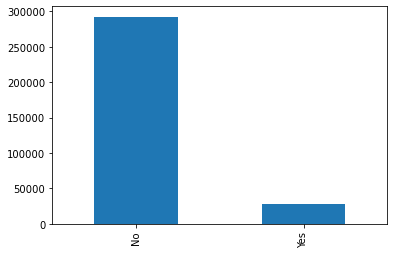

In [11]:
ordinal_column(data["HeartDisease"])

#### Data set is fully imbalnced.

Unique data:  ['Yes' 'No'] 

Numberof unique data:  2 

What are values of unique data: 
 No     187887
Yes    131908
Name: Smoking, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


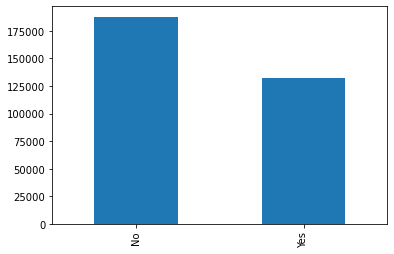

In [12]:
ordinal_column(data["Smoking"])

Unique data:  ['No' 'Yes'] 

Numberof unique data:  2 

What are values of unique data: 
 No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


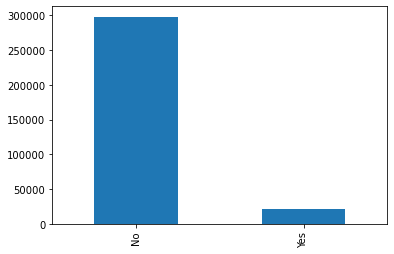

In [13]:
ordinal_column(data["AlcoholDrinking"])

Unique data:  ['No' 'Yes'] 

Numberof unique data:  2 

What are values of unique data: 
 No     307726
Yes     12069
Name: Stroke, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


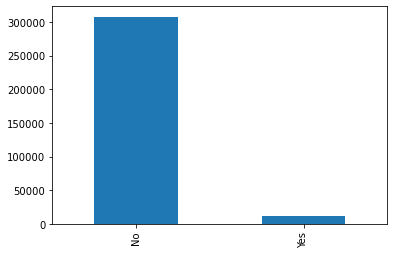

In [14]:
ordinal_column(data["Stroke"])

Unique data:  ['No' 'Yes'] 

Numberof unique data:  2 

What are values of unique data: 
 No     275385
Yes     44410
Name: DiffWalking, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


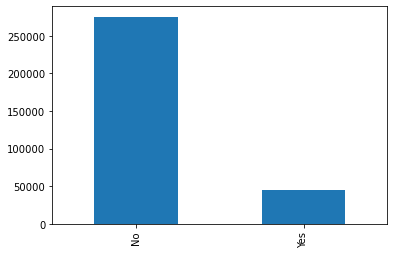

In [15]:
ordinal_column(data["DiffWalking"])

Unique data:  ['Female' 'Male'] 

Numberof unique data:  2 

What are values of unique data: 
 Female    167805
Male      151990
Name: Sex, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


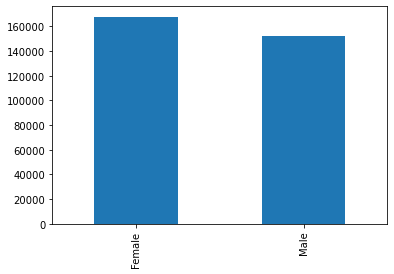

In [16]:
ordinal_column(data["Sex"])

Unique data:  ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Numberof unique data:  13 

What are values of unique data: 
 65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


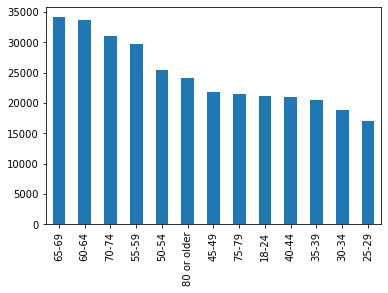

In [17]:
ordinal_column(data["AgeCategory"])

Unique data:  ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Numberof unique data:  6 

What are values of unique data: 
 White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


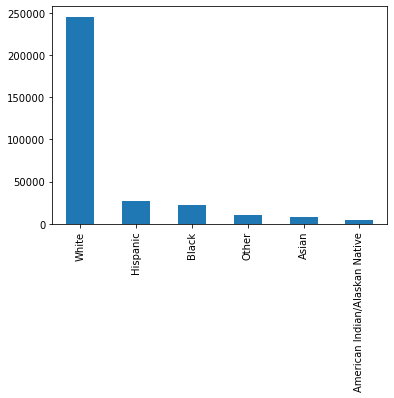

In [18]:
ordinal_column(data["Race"])

Unique data:  ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

Numberof unique data:  4 

What are values of unique data: 
 No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


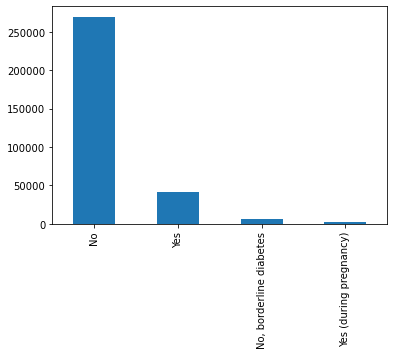

In [19]:
ordinal_column(data["Diabetic"])

Unique data:  ['Yes' 'No'] 

Numberof unique data:  2 

What are values of unique data: 
 Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


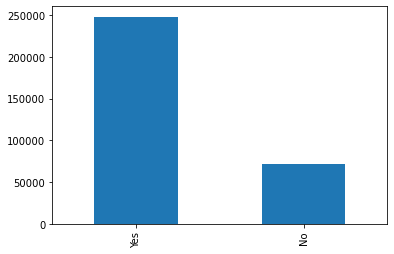

In [20]:
ordinal_column(data["PhysicalActivity"])

Unique data:  ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

Numberof unique data:  5 

What are values of unique data: 
 Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


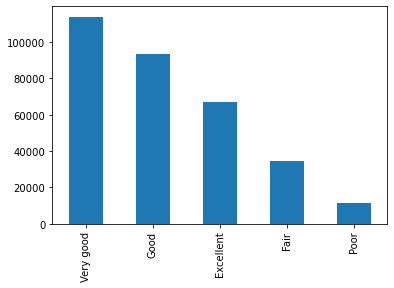

In [21]:
ordinal_column(data["GenHealth"])

Unique data:  ['Yes' 'No'] 

Numberof unique data:  2 

What are values of unique data: 
 No     276923
Yes     42872
Name: Asthma, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


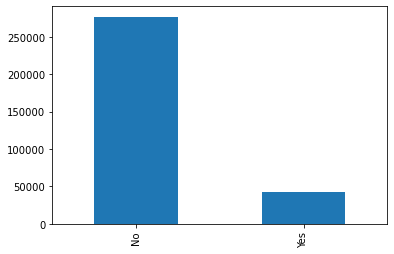

In [22]:
ordinal_column(data["Asthma"])

Unique data:  ['No' 'Yes'] 

Numberof unique data:  2 

What are values of unique data: 
 No     308016
Yes     11779
Name: KidneyDisease, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


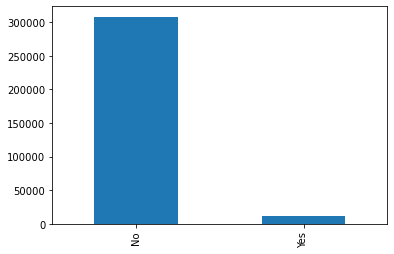

In [23]:
ordinal_column(data["KidneyDisease"])

Unique data:  ['Yes' 'No'] 

Numberof unique data:  2 

What are values of unique data: 
 No     289976
Yes     29819
Name: SkinCancer, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


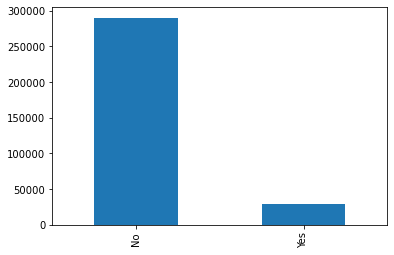

In [24]:
ordinal_column(data["SkinCancer"])

### AgeCategory shouldn't be categorical, so I will apply a function to calculate the mean age and make it a continuous feature

data["AgeCategory"]=data["AgeCategory"].map({'18-24':21,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52,
                        '55-59':57,'60-64':62,'65-69':67,'70-74':72,'75-79':12,'80 or older':80})

data['AgeCategory'] = data['AgeCategory'].astype('float') 



# convert the integer to float.. because here age is contionous varibale

In [25]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
data['AgeCategory'] = data['AgeCategory'].astype('float')

data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80.0,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67.0,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77.0,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42.0,White,No,Yes,Very good,8.0,No,No,No


In [26]:
data.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].style.background_gradient(cmap='Blues')

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
mean,28.325399,3.371710,3.898366,54.355759,7.097075
std,6.356100,7.950850,7.955235,17.720429,1.436007
min,12.020000,0.000000,0.000000,21.000000,1.000000
25%,24.030000,0.000000,0.000000,42.000000,6.000000
50%,27.340000,0.000000,0.000000,57.000000,7.000000
75%,31.420000,2.000000,3.000000,67.000000,8.000000
max,94.850000,30.000000,30.000000,80.000000,24.000000


In [27]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Now Convert the categorical column to numerical column:

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'PhysicalActivity','Asthma', 'KidneyDisease', 'SkinCancer']

for column in columns:
    data[column] = LabelEncoder().fit_transform(data[column])

In [29]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80.0,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,White,No,1,Very good,8.0,0,0,0


### Here the the column which conatin boolen value it convert to int type and 0= false and 1= True

In [30]:


data["Race"]=data["Race"].map({'White':1,'Hispanic':2,'Black':3,'Other':4,'Asian':5,'American Indian/Alaskan Native':6})

data["Diabetic"]=data["Diabetic"].map({'No':1,'Yes':2,'No, borderline diabetes':3,'Yes (during pregnancy)':4})

data["GenHealth"]=data["GenHealth"].map({'Very good':1,'Good':2,'Excellent':3,'Fair':4,'Poor':5})


In [31]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,1,2,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80.0,1,1,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,1,2,1,4,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,1,1,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,1,1,1,1,8.0,0,0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

# Missing value

Check Missing Value presnt in the data set or not:  
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64 

Visualize: 
 AxesSubplot(0.125,0.125;0.62x0.755)


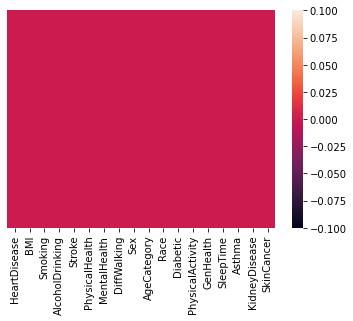

In [33]:
print("Check Missing Value presnt in the data set or not: ","\n",data.isnull().sum(),"\n")
print("Visualize:","\n",sns.heatmap(data.isnull(),yticklabels=False))

In this dataset there are no null value present in the data set.

# 4.Vizualization

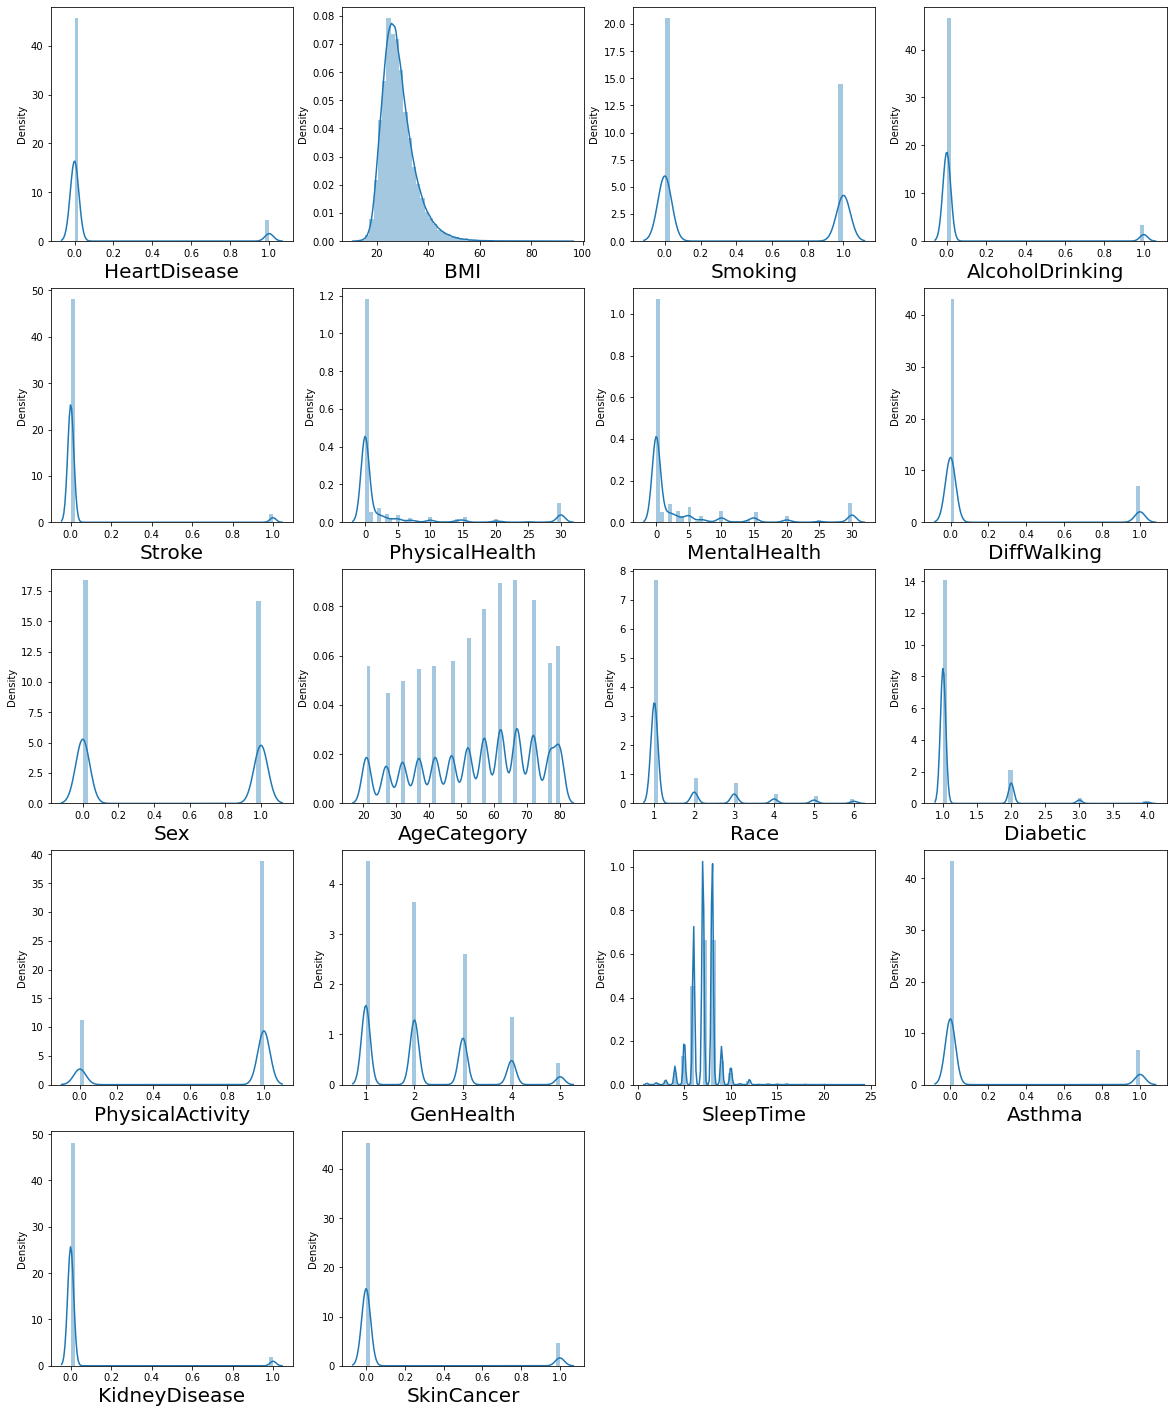

In [34]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18 :     # as there are 24 columns in the data
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#plt.savefig('Distribution plot.png')

In [35]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

<AxesSubplot:xlabel='AgeCategory', ylabel='HeartDisease'>

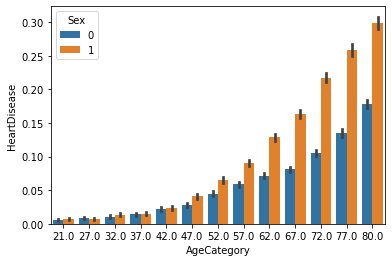

In [36]:
##Visualisation AgeCategory vs HeartDisease
sns.barplot('AgeCategory','HeartDisease',hue='Sex',data=data)

## Visualisation AgeCategory vs HeartDisease: there are maximum 77 and 80 age male person are in heart problem.

<AxesSubplot:xlabel='Smoking', ylabel='HeartDisease'>

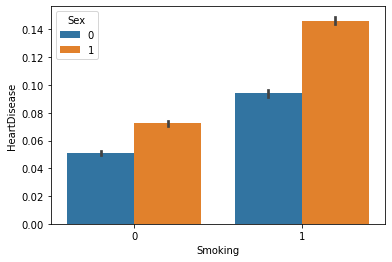

In [37]:
sns.barplot('Smoking','HeartDisease',hue='Sex',data=data)

Those who have smoke get maximum heart disease.

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='HeartDisease'>

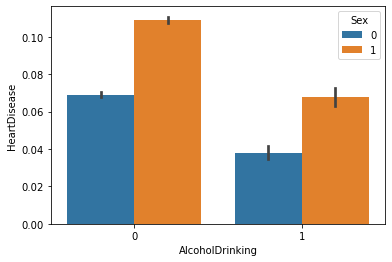

In [38]:
sns.barplot('AlcoholDrinking','HeartDisease',hue='Sex',data=data)

when compare AlcoholDrinking and Smoking , smoking is mostly impacted.

<AxesSubplot:xlabel='GenHealth', ylabel='HeartDisease'>

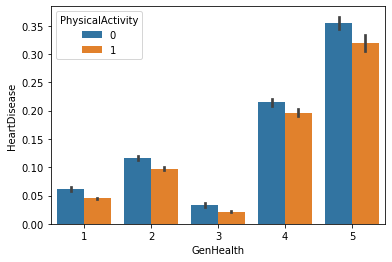

In [39]:
sns.barplot('GenHealth','HeartDisease',hue='PhysicalActivity',data=data)

GenHealth: 'Very good':1,'Good':2,'Excellent':3,'Fair':4,'Poor':5,

HeartDisease:No:0 and Yes:1

PhysicalActivity:No:0 and yes:1 



                    

#### By using the Visualiztion tool its concluded that smoking is main cause of heart problem and genral health condition and physical activity control the heart problem.

In [40]:
female_with_heart_disease = len(data[(data['HeartDisease']==1) & (data['Sex']==0)])
num_female = len(data[data['Sex']==0])

male_with_heart_disease = len(data[(data['HeartDisease']==1) & (data['Sex']==1)])
num_male = len(data[data['Sex']==1])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738


Most heart disease patients are Male than Females

More Females were tested than males

Males are approximately 1.6 times more likely to have heart disease than females

# 5.Data Cleaning & Preprocessing

In [41]:
print('Continuous Columns')
data.select_dtypes(include=['float']).describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

Continuous Columns


,min,mean,max
BMI,12.020000,28.325399,94.850000
PhysicalHealth,0.000000,3.371710,30.000000
MentalHealth,0.000000,3.898366,30.000000
AgeCategory,21.000000,54.355759,80.000000
SleepTime,1.000000,7.097075,24.000000


In [42]:
data[['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']]

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
0,16.60,3.0,30.0,57.0,5.0
1,20.34,0.0,0.0,80.0,7.0
2,26.58,20.0,30.0,67.0,8.0
3,24.21,0.0,0.0,77.0,6.0
4,23.71,28.0,0.0,42.0,8.0
...,...,...,...,...,...
319790,27.41,7.0,0.0,62.0,6.0
319791,29.84,0.0,0.0,37.0,5.0
319792,24.24,0.0,0.0,47.0,6.0
319793,32.81,0.0,0.0,27.0,12.0


The range of continuous features are different.
Here, I am scaling them to be in-between 0 to 1 by dividing by the maximum value of the respective column (min max scaler)

In [43]:
for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    
    col_min = data[col].min()
    col_max = data[col].max()

    data[col] = (data[col] - col_min) / (col_max - col_min)
    
    

In [44]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,0.610169,1,2,1,1,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,1.000000,1,1,1,1,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,0.779661,1,2,1,4,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,0.949153,1,1,0,2,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,0.355932,1,1,1,1,0.304348,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.185802,1,0,0,0.233333,0.0,1,1,0.694915,2,2,0,4,0.217391,1,0,0
319791,0,0.215139,1,0,0,0.000000,0.0,0,1,0.271186,2,1,1,1,0.173913,1,0,0
319792,0,0.147531,0,0,0,0.000000,0.0,0,0,0.440678,2,1,1,2,0.217391,0,0,0
319793,0,0.250996,0,0,0,0.000000,0.0,0,0,0.101695,2,1,0,2,0.478261,0,0,0


To create a better model scaling the continous column data because with out scaling create a model, then model will be focous on the maximaum range value column so scaling the columns which gives best accuracy.

# 6.Correlation Matrix (Feature Selection)

In [45]:
data.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,0.196854,0.412477,0.068097,0.037740,0.112390,0.129946,0.138870,0.475273,0.565352,1.514048,1.194002,0.775362,2.175753,0.265090,0.134061,0.036833,0.093244
std,0.279766,0.076737,0.492281,0.251912,0.190567,0.265028,0.265175,0.345812,0.499389,0.300346,1.107419,0.496776,0.417344,1.133848,0.062435,0.340718,0.188352,0.290775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.144996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355932,1.000000,1.000000,1.000000,1.000000,0.217391,0.000000,0.000000,0.000000
50%,0.000000,0.184957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610169,1.000000,1.000000,1.000000,2.000000,0.260870,0.000000,0.000000,0.000000
75%,0.000000,0.234215,1.000000,0.000000,0.000000,0.066667,0.100000,0.000000,1.000000,0.779661,1.000000,1.000000,1.000000,3.000000,0.304348,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# Finding out the correlation between the features
corr = data.corr()
corr

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.231583,-0.027635,0.124840,-0.100030,0.167840,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.000446,0.020273,0.169630,-0.150616,0.063676,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.130612,-0.040553,0.040489,-0.097174,0.074660,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.058587,-0.028397,-0.046021,0.017487,-0.018582,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.136738,0.006963,0.076849,-0.079455,0.125629,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.111010,0.004970,0.118268,-0.232283,0.417940,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155327,0.020785,0.033609,-0.095808,0.174646,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.241328,0.012960,0.160151,-0.278524,0.321570,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067001,-0.008166,-0.034567,0.048247,-0.008354,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.231583,-0.000446,0.130612,-0.058587,0.136738,0.111010,-0.155327,0.241328,-0.067001,1.000000,-0.149302,0.152721,-0.120369,0.060662,0.102700,-0.057887,0.122493,0.261391


<AxesSubplot:>

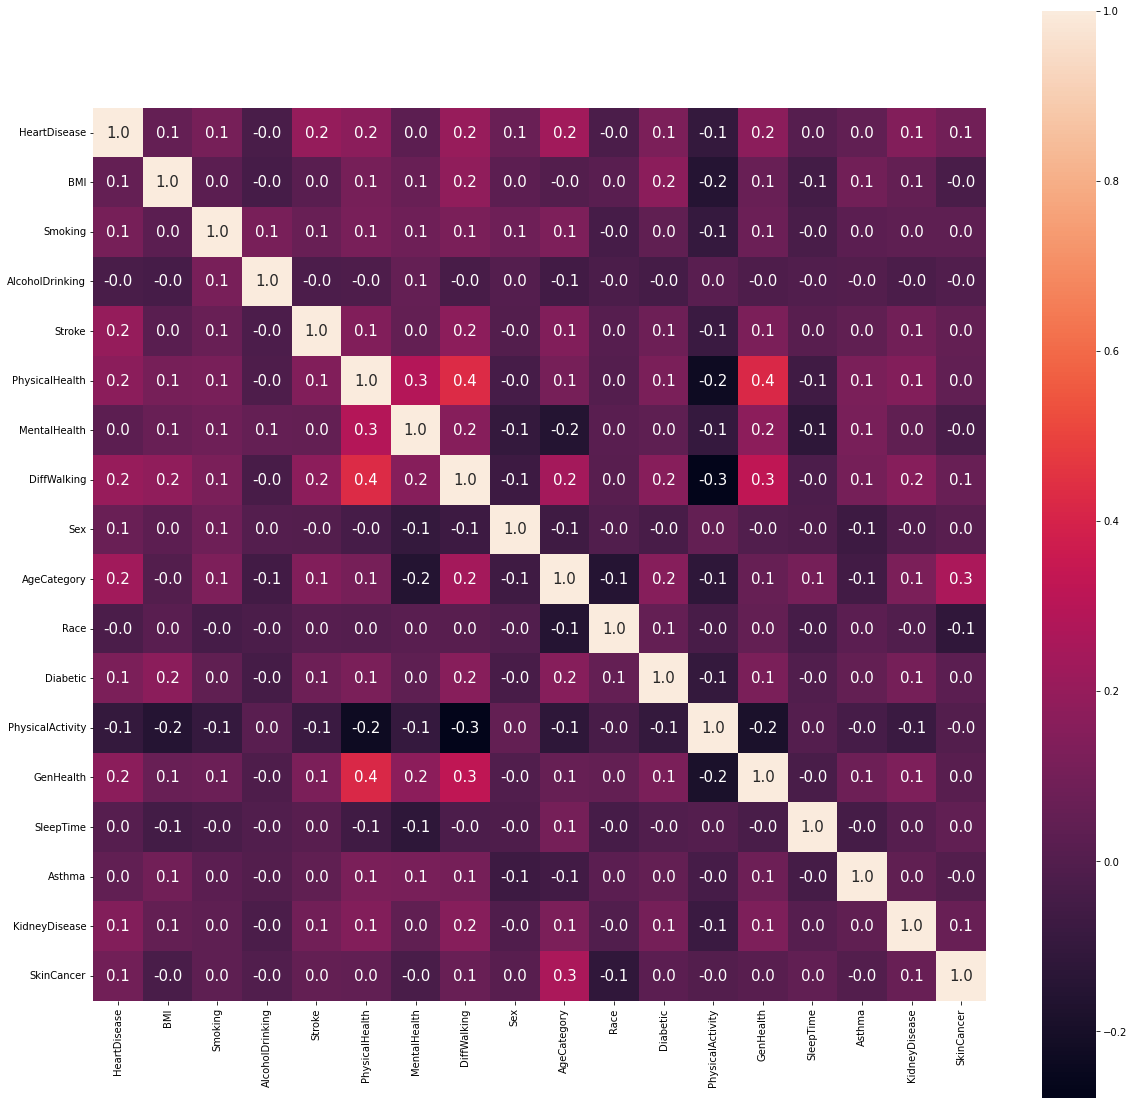

In [47]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

### The dataset is not balanced, there is way more number of samples for people who have no Heart Disease than people with Heart Disease.
This can be fixed by oversampling the data

 it is perfectly understandable that oversampling is better, because you keep all the information in the training dataset. With undersampling you drop a lot of information. Even if this dropped information belongs to the majority class, it is usefull information for a modeling algorithm.

Imbalanced classification is the problem of classification when there is an unequal distribution of classes in the training dataset. The imbalance in the class distribution may vary, but a severe imbalance is more challenging to model and may require specialized techniques.

In [48]:
class_0 = data[data['HeartDisease'] == 0]
class_1 = data[data['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
data= pd.concat([class_0, class_1], axis=0)
print('Data :')
print(data['HeartDisease'].value_counts())

Data :
0    292422
1    292422
Name: HeartDisease, dtype: int64


In [49]:
data[data['HeartDisease'] == 0]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,0.610169,1,2,1,1,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,1.000000,1,1,1,1,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,0.779661,1,2,1,4,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,0.949153,1,1,0,2,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,0.355932,1,1,1,1,0.304348,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,0.123144,0,0,0,0.000000,0.0,0,0,0.000000,2,1,1,3,0.304348,0,0,0
319791,0,0.215139,1,0,0,0.000000,0.0,0,1,0.271186,2,1,1,1,0.173913,1,0,0
319792,0,0.147531,0,0,0,0.000000,0.0,0,0,0.440678,2,1,1,2,0.217391,0,0,0
319793,0,0.250996,0,0,0,0.000000,0.0,0,0,0.101695,2,1,0,2,0.478261,0,0,0


In [50]:
data[data['HeartDisease'] == 1]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
245398,1,0.216467,1,0,0,0.000000,0.000000,0,1,0.610169,1,2,1,2,0.304348,0,0,0
275363,1,0.250513,1,0,0,1.000000,0.500000,0,0,0.949153,1,2,1,4,0.434783,0,0,0
156255,1,0.149101,1,0,0,0.000000,0.000000,0,0,0.949153,1,3,0,2,0.304348,0,0,0
92871,1,0.148014,0,0,0,0.000000,0.100000,0,1,0.271186,3,1,1,1,0.304348,0,0,0
122866,1,0.188941,1,0,0,0.100000,0.066667,0,1,0.864407,1,1,1,1,0.347826,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131790,1,0.149101,0,0,0,0.000000,0.000000,0,1,1.000000,4,2,1,1,0.260870,0,1,0
190721,1,0.149583,1,0,0,0.033333,0.033333,0,1,1.000000,1,1,1,2,0.260870,0,0,0
82413,1,0.147169,0,0,0,0.100000,0.500000,1,0,1.000000,1,1,0,4,0.347826,0,0,1
989,1,0.174333,1,0,0,0.000000,0.000000,0,1,1.000000,1,1,0,2,0.304348,0,0,0


In [51]:
# drop unused column
X = data.drop(columns=['HeartDisease'])
y=data["HeartDisease"]

In [52]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.055294,1,0,0,0.100000,1.000000,0,0,0.610169,1,2,1,1,0.173913,1,0,1
1,0.100447,0,0,1,0.000000,0.000000,0,0,1.000000,1,1,1,1,0.260870,0,0,0
2,0.175782,1,0,0,0.666667,1.000000,0,1,0.779661,1,2,1,4,0.304348,1,0,0
3,0.147169,0,0,0,0.000000,0.000000,0,0,0.949153,1,1,0,2,0.217391,0,0,1
4,0.141132,0,0,0,0.933333,0.000000,1,0,0.355932,1,1,1,1,0.304348,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131790,0.149101,0,0,0,0.000000,0.000000,0,1,1.000000,4,2,1,1,0.260870,0,1,0
190721,0.149583,1,0,0,0.033333,0.033333,0,1,1.000000,1,1,1,2,0.260870,0,0,0
82413,0.147169,0,0,0,0.100000,0.500000,1,0,1.000000,1,1,0,4,0.347826,0,0,1
989,0.174333,1,0,0,0.000000,0.000000,0,1,1.000000,1,1,0,2,0.304348,0,0,0


In [53]:
y

0         0
1         0
2         0
3         0
4         0
         ..
131790    1
190721    1
82413     1
989       1
163741    1
Name: HeartDisease, Length: 584844, dtype: int32

# Model Creation

### Logistic Regression:

In [54]:
from sklearn.linear_model import LogisticRegression

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#from sklearn.cross_validation import cross_val_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [55]:
print("Split the data into training and test set")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=355)

Split the data into training and test set


In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(438633, 17)
(438633,)
(146211, 17)
(146211,)


In [57]:
print('-'*30,' Shape of train and test dataset ','-'*30)
print('X train : {}, y train: {}'.format(X_train.shape, y_train.shape))
print('X test : {}, y test: {}'.format(X_test.shape, y_test.shape))
print('-'*100)

------------------------------  Shape of train and test dataset  ------------------------------
X train : (438633, 17), y train: (438633,)
X test : (146211, 17), y test: (146211,)
----------------------------------------------------------------------------------------------------


In [58]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_hat=log_reg.predict(X_train)

print("Train data score","{:.2%}".format(log_reg.score(X_train, y_train)))


Train data score 75.28%


In [60]:
predict_dataframe_train=pd.DataFrame({"Real Values train":y_train, "Predicted Values train" :y_hat})
predict_dataframe_train.head()

,Real Values train,Predicted Values train
293641,1,1
19027,1,1
64818,1,1
39764,1,1
223294,0,1


In [61]:
y_pred=log_reg.predict(X_test)

print("Test data score","{:.2%}".format(log_reg.score(X_test, y_test)))

Test data score 75.40%


In [62]:
predict_dataframe_test=pd.DataFrame({"Real Values test":y_test, "Predicted Values test" :y_pred})
predict_dataframe_test.head()

,Real Values test,Predicted Values test
22665,0,0
260813,0,1
243914,0,0
286834,0,0
58450,0,0


## Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.

In [63]:
cf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
cf_matrix

array([[54120, 19038],
       [16936, 56117]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

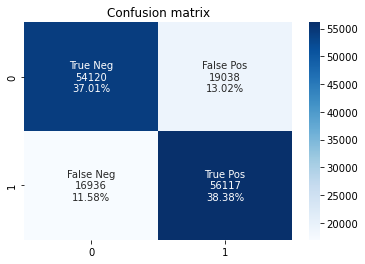

In [64]:
# plot confusion matrix

# labels
group_names = ['True Neg','False Pos','False Neg','True Pos']
# counts
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
# percentages
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.title('Confusion matrix')

#plt.savefig("Confusion matrix plot.png")


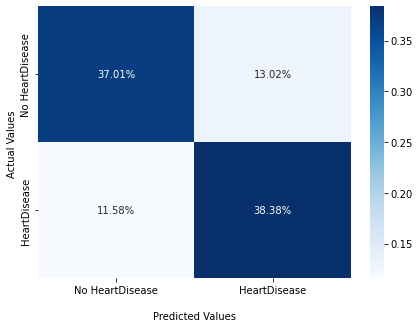

In [65]:
cf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cf_matrix /np.sum(cf_matrix ),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

In [66]:
True_negative = cf_matrix[0][0]
False_positive = cf_matrix[0][1]
False_negative = cf_matrix[1][0]
True_positive = cf_matrix[1][1]

In [67]:
print("True Negative: ",True_negative)
print("False Positive: ",False_positive)
print("False Negative: ",False_negative)
print("True Positive: ",True_positive)

True Negative:  54120
False Positive:  19038
False Negative:  16936
True Positive:  56117


In [68]:
Total_Error = False_negative+ False_positive
Total_Error

35974

###### Now,lets caluclate the accuracy, recall and precision values for the created classfier by usng the deecision tree classfication algorithm:

In [69]:
Accuracy = (True_positive + True_negative) / (True_positive +False_positive + False_negative + True_negative)
Accuracy

0.7539583205094008

In [70]:
# Precison
Precision = True_positive/(True_positive+False_positive)
Precision

0.7466835207238374

In [71]:
# Recall & sensitivity
Recall = True_positive/(True_positive+False_negative)
Recall

0.7681683161540251

In [72]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7572735614811617

In [73]:
accuracy=metrics.accuracy_score(y_test,y_pred)
recall= metrics.recall_score(y_test,y_pred)
Precision=metrics.precision_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)

In [74]:
print("Confusion_matrix accuracy :",accuracy)
print("Confusion_matrix precision :",Precision)
print("Confusion_matrix recall :",recall)
print("Confusion_matrix f1_score :",f1_score)
print("Confusion_matrix total error :",Total_Error)

Confusion_matrix accuracy : 0.7539583205094008
Confusion_matrix precision : 0.7466835207238374
Confusion_matrix recall : 0.7681683161540251
Confusion_matrix f1_score : 0.7572735614811617
Confusion_matrix total error : 35974


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     73158
           1       0.75      0.77      0.76     73053

    accuracy                           0.75    146211
   macro avg       0.75      0.75      0.75    146211
weighted avg       0.75      0.75      0.75    146211



In [76]:
#Calculation of True Positive Rate and False Positive Rate
TPR = True_positive/(True_positive+False_negative) #equal to Recall
FPR = False_positive/ (False_positive +  True_negative )
print("True Positive Rate : {}, False Positive Rate : {}".format(FPR,TPR))

True Positive Rate : 0.26023128024276226, False Positive Rate : 0.7681683161540251


In [77]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7539685179556315

In [78]:
TPR,FPR, thresholds = roc_curve(y_test, y_pred)

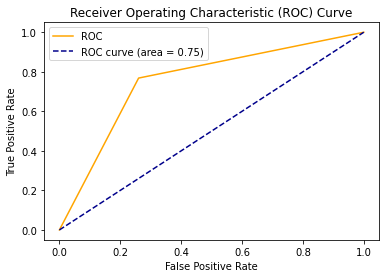

In [79]:
plt.plot(TPR,FPR, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#plt.savefig("Receiver Operating Characteristic (ROC) Curve plot.png")

In [80]:
thresholds

array([2, 1, 0])

In [81]:
TPR

array([0.        , 0.26023128, 1.        ])

In [82]:
FPR

array([0.        , 0.76816832, 1.        ])

ROC curve, also known as Receiver Operating Characteristics Curve, is a metric used to measure the performance of a classifier model. The ROC curve depicts the rate of true positives with respect to the rate of false positives, therefore highlighting the sensitivity of the classifier model. The ROC is also known as a relative operating characteristic curve, as it is a comparison of two operating characteristics, the True Positive Rate and the False Positive Rate, as the criterion changes. An ideal classifier will have a ROC where the graph would hit a true positive rate of 100% with zero false positives. We generally measure how many correct positive classifications are being gained with an increment in the rate of false positives.

ROC curve can be used to select a threshold for a classifier, which maximizes the true positives and in turn minimizes the false positives. ROC Curves help determine the exact trade-off between the true positive rate and false-positive rate for a model using different measures of probability thresholds. ROC curves are more appropriate to be used when the observations present are balanced between each class. This method was first used in signal detection but is now also being used in many other areas such as medicine, radiology, natural hazards other than machine learning. A discrete classifier returns only the predicted class and gives a single point on the ROC space. But for probabilistic classifiers, which give a probability or score that reflects the degree to which an instance belongs to one class rather than another, we can create a curve by changing the threshold for the score.

What is an AUC? 

Area Under Curve or AUC is one of the most widely used metrics for model evaluation. It is generally used for binary classification problems. AUC measures the entire two-dimensional area present underneath the entire ROC curve. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than that of a randomly chosen negative example. The Area Under the Curve provides the ability for a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, it is assumed that the better the performance of the model at distinguishing between the positive and negative classes. 

# model-2

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rand_clf = RandomForestClassifier()

rand_clf.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
def feat_importance(m,df):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

In [86]:
importance = feat_importance(rand_clf,X)
importance[:]*100

,Importance
BMI,28.055881
AgeCategory,18.767654
GenHealth,9.046005
SleepTime,8.470281
PhysicalHealth,6.283435
MentalHealth,5.606849
DiffWalking,3.515037
Diabetic,3.353481
Race,3.121942
Stroke,2.644060


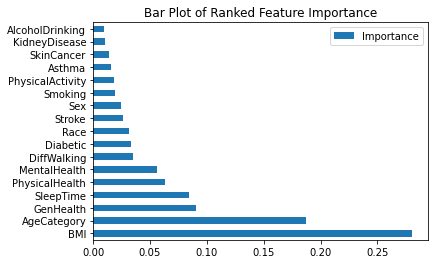

In [87]:
#importance.plot(kind='bar')
importance.plot(kind='barh')

plt.title("Bar Plot of Ranked Feature Importance")
plt.show()

In [88]:
y_random_hat=rand_clf.predict(X_train)

print("Train data score","{:.2%}".format(rand_clf.score(X_train, y_train)))

Train data score 99.67%


In [97]:
y_random_pred=rand_clf.predict(X_test)

print("Test data score","{:.2%}".format(rand_clf.score(X_test, y_test)))

Test data score 96.72%


In [90]:
random_dataframe_train=pd.DataFrame({"Real Values train":y_train, "Predicted Values train" :y_random_hat})
random_dataframe_train.head()

,Real Values train,Predicted Values train
293641,1,1
19027,1,1
64818,1,1
39764,1,1
223294,0,0


In [92]:
random_dataframe_test=pd.DataFrame({"Real Values train":y_test, "Predicted Values train" :y_random_pred})
random_dataframe_test.head()

,Real Values train,Predicted Values train
22665,0,0
260813,0,1
243914,0,0
286834,0,0
58450,0,0


In [93]:
cf_mat_random = confusion_matrix(y_true = y_test, y_pred = y_random_pred)
cf_mat_random

array([[54120, 19038],
       [16936, 56117]], dtype=int64)

In [94]:
m_accuracy=metrics.accuracy_score(y_test,y_random_pred)
m_recall= metrics.recall_score(y_test,y_random_pred)
m_Precision=metrics.precision_score(y_test,y_random_pred)
m_f1_score=metrics.f1_score(y_test,y_random_pred)

In [95]:
print("Confusion_matrix accuracy :",m_accuracy)
print("Confusion_matrix precision :",m_Precision)
print("Confusion_matrix recall :",m_recall)
print("Confusion_matrix f1_score :",m_f1_score)


Confusion_matrix accuracy : 0.7539583205094008
Confusion_matrix precision : 0.7466835207238374
Confusion_matrix recall : 0.7681683161540251
Confusion_matrix f1_score : 0.7572735614811617


In [96]:
print(classification_report(y_test,y_random_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     73158
           1       0.75      0.77      0.76     73053

    accuracy                           0.75    146211
   macro avg       0.75      0.75      0.75    146211
weighted avg       0.75      0.75      0.75    146211



In [98]:
# SAVE MODEL
import pickle

filename = 'heart .pickle'
pickle.dump(rand_clf, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))